## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 1: Let's GOOOOO!

- **100 points [7% of your final grade]**
- **Due Tuesday, February 13 by 11:59pm**

***Goals of this homework:***
1. Collect data from the web, clean it, and then make some observations based on exploratory data analysis
2. Understand and implement the classic apriori algorithm and extensions to find the association rules in a movie rating dataset

***Submission instructions:***

You should post your notebook to Canvas (look for the homework 1 assignment there). Please name your submission **your-uin_hw1.ipynb**, so for example, my submission would be something like **555001234_hw1.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that. 

***Late Days:***

As a reminder, you may use up to three of your late days on this homework, meaning the latest we will accept it is February 16 by 11:59pm.

***Collaboration declaration:***

If you worked with someone on this homework, please be sure to mention that. Remember to include citations to any sources you use in the homework.

## (50 points) Part 1: UFOs

### (10pts) Part 1a: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going 
to focus only on UFO sightings in Texas, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlTX.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. 
You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. 
In particular, we're going to use the Python libraries **[requests](http://docs.python-requests.org/en/master/)** 
and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [1]:
# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufos_in_texas.csv'
import requests
import csv
from bs4 import BeautifulSoup

url = "http://www.nuforc.org/webreports/ndxlTX.html"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser')
table = soup.find('table')

rows = []
headers = []
for th in table.find("tr").find_all("th"):
  headers.append(th.text.strip())

rows.append(headers)
for tr in table.findAll('tr')[1:]:
    columns = tr.findAll('td')
    row = []
    for column in columns:
        row.append(column.text)
    rows.append(row)
   
file = open('ufos_in_texas.csv', 'w+', newline ='')   
with file:    
    write = csv.writer(file)
    write.writerows(rows)


Once you have your local csv file, you should read it in and then issue the .head() command.

In [2]:
# your code here
# with open('ufos_in_texas.csv', newline='') as csvfile:
#   spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
#   for row in spamreader:
#     print(', '.join(row))

### (15pts) Part 1b: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

You may find the **pandas** library to be very helpful for this part. Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Report the basic statistics of the duration in your new 'validated' dataset (report maximum, minimum, mean, and standard deviation values of duration). At last, plot a boxplot of the duration (in seconds) in your 'validated' dataset.

In [3]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds
import pandas as pd
original_df = pd.read_csv('ufos_in_texas.csv')
#df = original_df
validated_df = original_df[original_df.Duration.notnull()]
regex = '^[0-9]+\s(second|seconds|minute|minutes|hour|hours|day|days)$';
validated_df = validated_df[validated_df.Duration.str.match(regex)]

def convert_to_seconds(duration):
    if "second" in duration:
      return int(duration.split(" ")[0])
    if "minute" in duration:
      return int(duration.split(" ")[0])*60
    if "hour" in duration:
      return int(duration.split(" ")[0])*60*60
    if "day" in duration:
      return int(duration.split(" ")[0])*60*60*24    

validated_df['Duration'] = validated_df['Duration'].apply(convert_to_seconds)
validated_df.dtypes

Date / Time    object
City           object
State          object
Shape          object
Duration        int64
Summary        object
Posted         object
dtype: object

In [4]:
# your code here
# total rows in original dataset
print("Count of Original Dataframe")
print(len(original_df.index))
print()
# valid rows in your new 'validated' dataset
print("Count of Validated Dataframe")
print(len(validated_df.index))

Count of Original Dataframe
5631

Count of Validated Dataframe
2817


Maximum of validated dataset
345600

Minimum of validated dataset
1

Mean of validated dataset
1290.827831025914

Standard Deviation of validated dataset
10850.471660312376

Box Plot of Validated Dataset


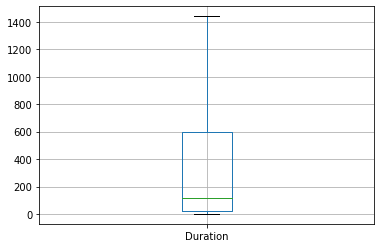

In [5]:
# your code here
# report the basic statistics of duration in 'validated' dataset
print("Maximum of validated dataset")
print(validated_df['Duration'].max())
print()
print("Minimum of validated dataset")
print(validated_df['Duration'].min())
print()
print("Mean of validated dataset")
print(validated_df['Duration'].mean())
print()
print("Standard Deviation of validated dataset")
print(validated_df['Duration'].std())
print()
# boxplot code here
print("Box Plot of Validated Dataset")
boxplot = validated_df.boxplot(showfliers=False, column=['Duration'])

### (15pts) Part 1c: Can we do better?
Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so **make detailed notes of what decisions you are making and why**.

In [6]:
# your code here 
# clean data
import re
filtered_df = original_df[original_df.Duration.notnull()] 

# convert cleaned durations to seconds
def convert_to_seconds(duration):
    unit = duration.split(" ")[1]
    time = duration.split(" ")[0]
    if "sec" in unit or unit == "s":
      return int(time)
    if "min" in unit:
      return int(time)*60
    if "hour" in unit or "hr" in unit:
      return int(time)*60*60
    if "day" in duration:
      return int(time)*60*60*24

# clean rows
def clean_data(duration):
  duration = duration.lower().strip()
  if '<' in duration:
    duration = duration.replace("<", "") 
  elif '>' in duration:
    duration = duration.replace(">", "")
  elif '-' in duration:
    if re.match(r"[0-9]+(-)[0-9]+\s", duration):
      duration = duration.split(" ")
      time = duration[0].split("-")
      avg_time = int((int(time[0])+int(time[1]))/2)
      duration = str(avg_time) + " " + duration[1]  

  regex = r"^[0-9]+\s+(sec|secs|s|second|seconds|min|mins|minute|minutes|hr|hrs|hour|hours|day|days)$"
  if re.match(regex, duration):
    return convert_to_seconds(duration)
  else:
    return None

filtered_df['Duration'] = filtered_df['Duration'].apply(clean_data)
cleaned_df = filtered_df[filtered_df.Duration.notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
# your code here
# total rows in original dataset
print("Count of Original Dataframe")
print(len(original_df.index))
print()
# valid rows in your cleaned dataset
print("Count of Cleaned Dataframe")
print(len(cleaned_df.index))

Count of Original Dataframe
5631

Count of Cleaned Dataframe
3862


Maximum of validated dataset
345600.0

Minimum of validated dataset
1.0

Mean of validated dataset
1198.2371828068358

Standard Deviation of validated dataset
10836.637350236431

Box Plot of Validated Dataset


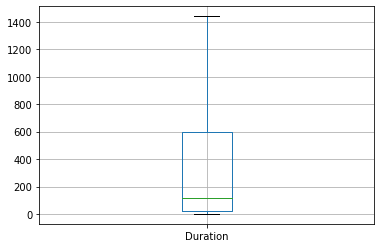

In [8]:
# your code here
# report the basic statistics of duration in your cleaned dataset
print("Maximum of validated dataset")
print(cleaned_df['Duration'].max())
print()
print("Minimum of validated dataset")
print(cleaned_df['Duration'].min())
print()
print("Mean of validated dataset")
print(cleaned_df['Duration'].mean())
print()
print("Standard Deviation of validated dataset")
print(cleaned_df['Duration'].std())
print()
# draw a boxplot for your cleaned dataset
print("Box Plot of Validated Dataset")
boxplot = cleaned_df.boxplot(showfliers=False, column=['Duration'])

### (5pts) Part 1d: Observations and Conclusions

Based on your analysis on part 1b and 1c, what observations or conclusions can you make from the data?

- After considering rows with **<, > and -,** number of rows cleaned increased from **2817** to **3245**.   
- Considering cases such as *2 mins, 10 s, 10 secs, 1 min*, no of cleaned rows further increased to **3651**. \\
- Considering strings to be case-insensitive, I got 3862 rows. \\
- Also there is a not much difference in mean and standard deviation which states that even with more cleaned data, distribution is sampled same way.

### (5pts) Part 1e: Next Steps

Now is your chance to conduct an interesting analysis on the UFO data you have collected. This is open-ended, so you may choose whatever direction you like. For example, you might want to take a look at the shape of the UFOs or perhaps the temporal aspects of the reports. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


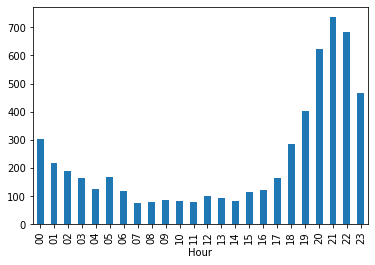

In [9]:
# your code here

new_df = original_df.rename(columns={'Date / Time': 'Time'})
cleaned_new_df = new_df[new_df.Time.notnull()]

# convert cleaned durations to seconds
def clean_data_3(date):
  day = date.split(" ")
  if len(day)==2:
    time= day[1].split(":")
    if int(time[0])<=24 and int(time[0])>=0:
      return time[0]
    else:
      return None 
  else:
    return None  

  # if len(day)==2:
  #   #return day[1]
  #   time = day[1].split(":")
  #   if len(time)!=2:
  #     return None 
  #   time_in_mins = int(time[0])*60 + int(time[1])
  #   if time_in_mins <=240:
  #     return "00:00"
  #   elif time_in_mins > 660 and time_in_mins <=960:  
  #     return "Afternoon"
  #   elif time_in_mins > 960 and time_in_mins <=1200:  
  #     return "Evening"
  #   elif time_in_mins > 1200 and time_in_mins <=1440:  
  #     return "Night"
  #   else:
  #     return "Midnight"
  # else:
  #   return None

cleaned_new_df['Hour'] = cleaned_new_df['Time'].apply(clean_data_3)
cleaned_new_df = cleaned_new_df[cleaned_new_df.Time.notnull()]
#cleaned_new_df

# draw a bar plot for your cleaned dataset
cleaned_new_df.groupby(['Hour']).size().plot(y="count", x="Hours of Day", kind = "bar")

*tell us what next steps you took, and what you discovered* \\
- In the above bar plot I have tried to visualize the time of sightings throughout the hours of the day. This provides an insight into what time of the day people generally report to have seen UFOs. \\
- Most of these sightings are at night or around midnight, which could lead to one of the analysis that most of these could be just some random flickeing of lights. \\

## (50 points) Part 2: Association Rules in Movie Rating Behaviors

For the second part of this homework, we're going to examine movies using our understanding of association rules, to find movies that "go together". For this part, you will implement the apriori algorithm, and apply it to a movie rating dataset. We'll use the [MovieLens](https://grouplens.org/datasets/movielens/) dataset.

First, run the next cell to load the dataset we are going to use.

In [30]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [31]:
!ls ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In this dataset, there are four columns: `userId` is the integer ids of users, `movieId` is the integer ids of movies, `rating` is the rate of the user gives to the movie, and `timestamp` which we do not use here. Each row denotes that the user of given `userId` rated the movie of the given `movieId`. We are going to treat each user as a "basket", so you will need to collect all the movies that have been rated by a single user as a basket. 

Now, you need to implement the apriori algorithm and apply it to this dataset to find association rules of user rating behaviors where:

1. Define `rating` >= 3 is "like" (that is, only consider movie ratings of 3 or higher in your baskets; you may ignore all others)
2. `minsup` == 40 (out of 600 users/baskets); we may adjust this based on the discussion on Campuswire
3. `minconf` == to be determined by a discussion on Campuswire. You may try several different choices, but we will converge on a good choice for everyone for the final submission.
 
We know there are many existing implementations of apriori online (check github for some good starting points). You are welcome to read existing codebases and let that inform your approach. Do not copy-paste any existing code. We want your code to have sufficient comments to explain your steps, to show us that you really know what you are doing. Furthermore, you should add print statements to print out the intermediate steps of your method -- e.g., the size of the candidate set at each step of the method, the size of the filtered set, and any other important information you think will highlight the method. 

To help get you started, we can load the ratings with the following code snippet:

In [32]:
import pandas as pd
# read user ratings
allRatings = pd.read_csv("ml-latest-small/ratings.csv")
allRatings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### (15pts) Step 1: Implement Apriori Algorithm
In this section, you need to implement the Apriori algorithm, we will check the correctness of your code and we encourage efficient implementation and skills of pruning.

In [33]:
#filter movies with ratings less than 3
allRatings = allRatings[allRatings['rating']>=3.0]
#group movies into buckets
print("after aggregating movies into buckets")
ratingsBuckets = allRatings.groupby('userId')['movieId'].agg([('movies_list',  lambda x: x.tolist())])
buckets = ratingsBuckets['movies_list'].to_list()
print("no of buckets = {}".format(len(buckets)))

after aggregating movies into buckets
no of buckets = 609


In [34]:
from collections import defaultdict
from itertools import chain, combinations
import time

# get itemsets which passes minimum support
def getFrequentItemSets(candidates, buckets, minSupport, support):
    freqItemSet = set()
    temp = defaultdict(int)

    # for each itemset check if subset exists in original buckets for support count
    for items in candidates:
        for itemSet in buckets:
            if items.issubset(itemSet):
                support[items] += 1
                temp[items] += 1

    for items, count in temp.items():
        if(count >= minSupport):
            freqItemSet.add(items)

    return freqItemSet


#  get all candidates of size 'size'
def getCandidates(itemSet, size):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == size])

# prune candiates for which subset already has less minimum support.
# e.g for frequent itemset ABC, if sup(AB) or sup (AC) < min_support, prune those candidates 
def pruning(candidates, prev, size):
    prunedCandidates = candidates.copy()
    for item in candidates:
        subsets = combinations(item, size)
        for subset in subsets:
            if(frozenset(subset) not in prev):
                prunedCandidates.remove(item)
                break
    return prunedCandidates

# get confidence
def getConfidence(item, s, support):
    return float(support[item] / support[frozenset(s)])

# generate rules by comaring confidence, e.g for itemset ABC, candidate rules are AB->C, etc.
def getRules(freqItemSet, support, minConfidence):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = chain.from_iterable(combinations(item, r) for r in range(1, len(item)))
            for s in subsets:
                confidence = getConfidence(item, s, support)
                if(confidence > minConfidence):
                    rules.append([set(s), set(item.difference(s))])
    return rules

# main function to run apriori algorithm
def apriori(buckets, minSupport, minConfidence):
    
    candidates = set()
    freqItemSets = dict()
    support = defaultdict(int)

    for itemSet in buckets:
        for item in itemSet:
            candidates.add(frozenset([item]))

    start_time = time.time()
    # generate frequent itemsets of size 1
    freqSet = getFrequentItemSets(candidates, buckets, minSupport, support)
    size = 1

    # loop until size of frequent itemset is 0.
    while(freqSet):

        curr_time = time.time()

        print("frequent itemset of size {} generated, size={}".format(size, len(freqSet)))
        print("Time elapsed = {:.2f} seconds".format(curr_time-start_time))
        print()

        freqItemSets[size] = freqSet

        size+=1

        candidates = getCandidates(freqSet, size)
        candidates = pruning(candidates, freqSet, size-1)
        freqSet = getFrequentItemSets(candidates, buckets, minSupport, support)

    rules = getRules(freqItemSets, support, minConfidence)

    return freqItemSets, rules   

In [35]:
start_time = time.time()

min_supp = 150
min_conf = 0.8

print()
print("parameters with sampling: length of buckets = {}, minimum support = {}, minimum confidence = {}".format(len(buckets), min_supp, min_conf))

frequent_set, association_rules = apriori(buckets, min_supp, min_conf)

end_time = time.time()

print()
print("total time taken = {:.2f} seconds".format(end_time - start_time))
print()

for size in frequent_set:
  print('Frequent itemsets of size {}'.format(size))
  print('no of itemsets of size {} = {}'.format(size, len(frequent_set[size])))
  print(frequent_set[size])
  print()
  
print()
print('Association Rules')
print(association_rules)


parameters with sampling: length of buckets = 609, minimum support = 150, minimum confidence = 0.8
frequent itemset of size 1 generated, size=37
Time elapsed = 29.65 seconds

frequent itemset of size 2 generated, size=30
Time elapsed = 32.45 seconds

frequent itemset of size 3 generated, size=2
Time elapsed = 32.55 seconds


total time taken = 32.59 seconds

Frequent itemsets of size 1
no of itemsets of size 1 = 37
{frozenset({32}), frozenset({1}), frozenset({380}), frozenset({150}), frozenset({1196}), frozenset({2959}), frozenset({480}), frozenset({7153}), frozenset({1270}), frozenset({1210}), frozenset({4993}), frozenset({3578}), frozenset({1198}), frozenset({4306}), frozenset({2858}), frozenset({780}), frozenset({457}), frozenset({589}), frozenset({47}), frozenset({858}), frozenset({260}), frozenset({593}), frozenset({5952}), frozenset({588}), frozenset({592}), frozenset({364}), frozenset({318}), frozenset({2028}), frozenset({356}), frozenset({296}), frozenset({50}), frozenset({590

In [36]:
print(len(association_rules))

14


### (5pts) Step 2: Print Your Association Rules

Next you should print your final association rules in the following format:

**movie_name_1, movie_name_2, ... --> 
movie_name_k**

where the movie names can be fetched by joining the movieId with the file `movies.csv`. For example, one rule that you might find is:

**Matrix, The (1999),  Star Wars: Episode V - The Empire Strikes Back (1980),  Star Wars: Episode IV - A New Hope (1977),  -> 
Star Wars: Episode VI - Return of the Jedi (1983)**

In [37]:
# your code here
import pandas as pd
# read user ratings
movies = pd.read_csv("ml-latest-small/movies.csv")

# get movie name given movie id
def getMovieName(id, movies_df):
    return movies_df.loc[movies_df['movieId'] == id]['title'].values[0]

def getMappedAssociationRules(assoc_rules, movies_df):
  movies_association_rules = []
  for rule in assoc_rules:
      mapped_movies = []
      for id in rule[0]:
        mapped_movies.append(getMovieName(id, movies_df)) 
      mapped_rule = ', '.join(mapped_movies)
      mapped_rule = mapped_rule + '--> '
      mapped_movies = []
      for id in rule[1]:
        mapped_movies.append(getMovieName(id, movies_df))
      mapped_rule = mapped_rule + ', '.join(mapped_movies)  
      movies_association_rules.append(mapped_rule)

  return movies_association_rules

print("mapped association rules")
print()
mov_assoc_rules = getMappedAssociationRules(association_rules, movies)
for rule in mov_assoc_rules:
  print(rule)  
print()   

mapped association rules

Lord of the Rings: The Return of the King, The (2003)--> Lord of the Rings: The Fellowship of the Ring, The (2001)
Lord of the Rings: The Fellowship of the Ring, The (2001)--> Lord of the Rings: The Return of the King, The (2003)
Jurassic Park (1993)--> Forrest Gump (1994)
Star Wars: Episode V - The Empire Strikes Back (1980)--> Star Wars: Episode IV - A New Hope (1977)
Star Wars: Episode VI - Return of the Jedi (1983)--> Star Wars: Episode IV - A New Hope (1977)
Lord of the Rings: The Two Towers, The (2002)--> Lord of the Rings: The Fellowship of the Ring, The (2001)
Lord of the Rings: The Fellowship of the Ring, The (2001)--> Lord of the Rings: The Two Towers, The (2002)
Star Wars: Episode VI - Return of the Jedi (1983)--> Star Wars: Episode V - The Empire Strikes Back (1980)
Seven (a.k.a. Se7en) (1995)--> Pulp Fiction (1994)
Lord of the Rings: The Two Towers, The (2002)--> Lord of the Rings: The Return of the King, The (2003)
Lord of the Rings: The Return o

### (15pts) Step 3: Implement Random Sampling

We discussed in class a method to randomly sample baskets to avoid the overhead of reading the entire set of baskets (which in practice, could amount to billions of baskets). For this part, you should implement such a random sampling approach that takes a special parameter **alpha** that controls the size of the sample: e.g., alpha = 0.10 means to sample 10% of the baskets (our users, in this case). 

Vary **alpha** and report the number of frequent itemsets you find and how this compares to the number of frequent itemsets in the entire dataset. What do you discover?


In [38]:
# your code here
start_time = time.time()

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
frequent_set_sampled = dict()
association_rule_sampled = dict()
sampled_buckets = dict()
for alpha in alphas:
    sampledRatings = ratingsBuckets.sample(frac=alpha, replace=True, random_state=1)
    sampled_buckets[alpha] = sampledRatings['movies_list'].to_list()
    min_supp = 150*alpha
    min_conf = 0.8

    print("parameters with sampling: length of buckets = {}, alpha = {}, minimum support = {}, minimum confidence = {}"
    .format(len(sampled_buckets[alpha]), alpha, min_supp, min_conf))
    print()

    frequent_set_sampled[alpha], association_rule_sampled[alpha] = apriori(sampled_buckets[alpha], min_supp, min_conf)

    end_time = time.time()

    print()
    print("total time taken = {:.2f} seconds".format(end_time - start_time))
    print()

 

parameters with sampling: length of buckets = 61, alpha = 0.1, minimum support = 15.0, minimum confidence = 0.8

frequent itemset of size 1 generated, size=31
Time elapsed = 1.70 seconds

frequent itemset of size 2 generated, size=67
Time elapsed = 2.04 seconds

frequent itemset of size 3 generated, size=40
Time elapsed = 2.11 seconds

frequent itemset of size 4 generated, size=2
Time elapsed = 2.11 seconds


total time taken = 2.13 seconds

parameters with sampling: length of buckets = 122, alpha = 0.2, minimum support = 30.0, minimum confidence = 0.8

frequent itemset of size 1 generated, size=33
Time elapsed = 2.80 seconds

frequent itemset of size 2 generated, size=38
Time elapsed = 3.12 seconds

frequent itemset of size 3 generated, size=6
Time elapsed = 3.15 seconds


total time taken = 5.30 seconds

parameters with sampling: length of buckets = 183, alpha = 0.3, minimum support = 45.0, minimum confidence = 0.8

frequent itemset of size 1 generated, size=43
Time elapsed = 4.80 se

In [39]:
freq_set_sampled_best = frequent_set_sampled[0.6]
for size in freq_set_sampled_best:
    print('Frequent itemsets of size {}'.format(size))
    print('no of itemsets of size {} = {}'.format(size, len(freq_set_sampled_best[size])))
    print(freq_set_sampled_best[size])
    print()
      
print()
print('Association Rules for sampled data')
print(association_rule_sampled[0.6])

print()
print("no of association rules = {}".format(len(association_rule_sampled[0.6])))
print()
print("mapped association rules for sampled data")
print()
mov_assoc_rules_sampled = getMappedAssociationRules(association_rule_sampled[0.6], movies)
for rule in mov_assoc_rules_sampled:
    print(rule)  
print()     

Frequent itemsets of size 1
no of itemsets of size 1 = 35
{frozenset({32}), frozenset({1}), frozenset({150}), frozenset({1196}), frozenset({2959}), frozenset({480}), frozenset({7153}), frozenset({4226}), frozenset({1270}), frozenset({1210}), frozenset({4993}), frozenset({1198}), frozenset({4306}), frozenset({58559}), frozenset({2858}), frozenset({780}), frozenset({457}), frozenset({589}), frozenset({47}), frozenset({377}), frozenset({858}), frozenset({260}), frozenset({593}), frozenset({5952}), frozenset({588}), frozenset({318}), frozenset({364}), frozenset({2028}), frozenset({356}), frozenset({648}), frozenset({296}), frozenset({50}), frozenset({110}), frozenset({527}), frozenset({2571})}

Frequent itemsets of size 2
no of itemsets of size 2 = 26
{frozenset({296, 356}), frozenset({356, 589}), frozenset({110, 318}), frozenset({7153, 4993}), frozenset({480, 356}), frozenset({1196, 260}), frozenset({50, 318}), frozenset({480, 110}), frozenset({593, 318}), frozenset({593, 356}), frozenset

In [40]:
#false positive between sampled and whole dataset
for alpha in alphas:
  print("alpha = {}".format(alpha))   
  count = 0
  total = 0
  frequent_set_sampled_temp = frequent_set_sampled[alpha]
  for size in frequent_set_sampled_temp:
    freq_sampled = frequent_set_sampled_temp[size] 
    if size in frequent_set.keys():
      freq_whole = frequent_set[size]
      for itemset in freq_sampled:
        total +=1
        if itemset not in freq_whole:
          count += 1
     
  print("total itemset= {}".format(total))      
  print("false positives = {}".format(count))
  print()
  print()

alpha = 0.1
total itemset= 138
false positives = 91


alpha = 0.2
total itemset= 77
false positives = 30


alpha = 0.3
total itemset= 144
false positives = 81


alpha = 0.4
total itemset= 98
false positives = 33


alpha = 0.5
total itemset= 76
false positives = 18


alpha = 0.6
total itemset= 63
false positives = 10


alpha = 0.7
total itemset= 69
false positives = 11


alpha = 0.8
total itemset= 68
false positives = 8


alpha = 0.9
total itemset= 69
false positives = 8





- With **alpha = 0.1** i.e 10% of the buckets, it gives almost 65% as false positives, which is very high. The reason for this is since we have sampled very low buckets, this does not give a good idea of original itemsets.
- with **alpha = 0.9** i.e 90% of the buckets, it gives almost 10% as false positives, which is considerably low. The reason for this is since we have sampled almost all buckets, this is expected to be similar to original.
- with **alpha = 0.6 or 0.5**, i.e almost half the buckets it gives a good sampling example and does not produce a lot of false positives.

### (10pts) Step 4: Check for False Positives

Next you should verify that the candidate pairs you discover by random sampling are truly frequent by comparing to the itemsets you discover over the entire dataset. 

For this part, consider another parameter **minsup_sample** that relaxes the minimum support threshold. For example if we want minsup = 1/100 for whole dataset, then try minsup_sample = 1/125 for the sample. This will help catch truly frequent itemsets.

Vary **minsup_sample** and report the number of frequent itemsets you find and the number of false positives you find. What do you discover?


In [55]:
start_time = time.time()
alpha = 0.6
minsup_samples = [0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

frequent_set_sampled2 = dict()
association_rules_sampled2 = dict()

for minsup_sample in minsup_samples:
    min_supp = 150*alpha*minsup_sample
    min_conf = 0.8

    print("parameters with sampling: length of buckets = {}, minsup_sample = {}, minimum support = {}, minimum confidence = {}"
    .format(len(sampled_buckets[alpha]), minsup_sample, min_supp, min_conf))
    print()

    frequent_set_sampled2[minsup_sample], association_rules_sampled2[minsup_sample] = apriori(sampled_buckets[alpha], min_supp, min_conf)

    end_time = time.time()

    print()
    print("total time taken = {:.2f} seconds".format(end_time - start_time))
    print()

    freq_set_sampled2 = frequent_set_sampled2[minsup_sample]

    for size in freq_set_sampled2:
      print('Frequent itemsets of size {}'.format(size))
      print('no of itemsets of size {} = {}'.format(size, len(freq_set_sampled2[size])))
      print()

parameters with sampling: length of buckets = 365, minsup_sample = 0.5, minimum support = 45.0, minimum confidence = 0.8

frequent itemset of size 1 generated, size=175
Time elapsed = 11.89 seconds

frequent itemset of size 2 generated, size=1051
Time elapsed = 42.24 seconds

frequent itemset of size 3 generated, size=1686
Time elapsed = 55.62 seconds

frequent itemset of size 4 generated, size=956
Time elapsed = 61.48 seconds

frequent itemset of size 5 generated, size=198
Time elapsed = 62.72 seconds

frequent itemset of size 6 generated, size=13
Time elapsed = 62.78 seconds


total time taken = 62.87 seconds

Frequent itemsets of size 1
no of itemsets of size 1 = 175

Frequent itemsets of size 2
no of itemsets of size 2 = 1051

Frequent itemsets of size 3
no of itemsets of size 3 = 1686

Frequent itemsets of size 4
no of itemsets of size 4 = 956

Frequent itemsets of size 5
no of itemsets of size 5 = 198

Frequent itemsets of size 6
no of itemsets of size 6 = 13

parameters with sam

In [56]:
print("mapped association rules for sampled data")
print()
mov_assoc_rules_sampled2 = getMappedAssociationRules(association_rules_sampled2[0.95], movies)
for rule in mov_assoc_rules_sampled2:
    print(rule)  
print()     

mapped association rules for sampled data

Lord of the Rings: The Return of the King, The (2003)--> Lord of the Rings: The Fellowship of the Ring, The (2001)
Lord of the Rings: The Fellowship of the Ring, The (2001)--> Lord of the Rings: The Return of the King, The (2003)
Lion King, The (1994)--> Forrest Gump (1994)
Jurassic Park (1993)--> Forrest Gump (1994)
Star Wars: Episode V - The Empire Strikes Back (1980)--> Star Wars: Episode IV - A New Hope (1977)
Braveheart (1995)--> Forrest Gump (1994)
Star Wars: Episode VI - Return of the Jedi (1983)--> Star Wars: Episode IV - A New Hope (1977)
Lord of the Rings: The Two Towers, The (2002)--> Lord of the Rings: The Fellowship of the Ring, The (2001)
Lord of the Rings: The Fellowship of the Ring, The (2001)--> Lord of the Rings: The Two Towers, The (2002)
Apollo 13 (1995)--> Shawshank Redemption, The (1994)
Lord of the Rings: The Return of the King, The (2003)--> Shawshank Redemption, The (1994)
Star Wars: Episode V - The Empire Strikes Back

In [58]:
#false positive between sampled and whole dataset
for minsup_sample in minsup_samples:
  count = 0
  total = 0
  freq_set_Sampled2 = frequent_set_sampled2[minsup_sample]
  for size in freq_set_Sampled2:
    freq_sampled2 = freq_set_Sampled2[size]
    for itemset in freq_sampled2:
      total +=1
      if size in frequent_set.keys():
        freq_whole = frequent_set[size]
        if itemset not in freq_whole:
          count += 1
  print("minsup sample ratio = {}".format(minsup_sample))        
  print("total itemset= {}".format(total))      
  print("false positives = {}".format(count))
  print()

minsup sample ratio = 0.5
total itemset= 4079
false positives = 2843

minsup sample ratio = 0.7
total itemset= 457
false positives = 374

minsup sample ratio = 0.75
total itemset= 295
false positives = 221

minsup sample ratio = 0.8
total itemset= 212
false positives = 141

minsup sample ratio = 0.85
total itemset= 156
false positives = 88

minsup sample ratio = 0.9
total itemset= 108
false positives = 42

minsup sample ratio = 0.95
total itemset= 84
false positives = 22



- With decrease in miniumum support sampling ratio, frequent itemsets keep on exploding, hence false positives also keeps on increasing. 
- I'm using a **support sampling ratio of 95/100**, meaning If i was using a support of 100/600, now I'm using 95/600 as minimum support.
- Reducing the support further for same number of sampled buckets actually increases number of false positives. 
- This can be attributed to the fact, that the number of frequent itemsets increases a lot ( 84 compared to 63 for alpha = 0.6), hence more chances of generating higher false positives.

### (5pts) Step 5: Extensions and Next Steps

So far, we have been working with a fairly small dataset. For this last question, try your sampling-based approach on the much larger: **Movies 10M** dataset: https://files.grouplens.org/datasets/movielens/ml-10m.zip

First, we need to load this larger dataset:

In [23]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-10m.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [24]:
! ls ml-10M100K/

allbut.pl  movies.dat  ratings.dat  README.html  split_ratings.sh  tags.dat


In [25]:
import pandas as pd
# read user ratings
allRatings_ml10M = pd.read_csv("ml-10M100K/ratings.dat",sep='::', names=["userId", "movieId", "rating", "timestamp"], engine='python')
allRatings_ml10M

,userId,movieId,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


In [26]:
allRatingsml10M = allRatings_ml10M[allRatings_ml10M['rating']>=3.0]
#group movies into buckets
print("after aggregating movies into buckets")
ratingsBuckets_ml10M = allRatings_ml10M.groupby('userId')['movieId'].agg([('movies_list',  lambda x: x.tolist())])
print("no of buckets before sampling = {}".format(len(ratingsBuckets_ml10M)))
print(len(ratingsBuckets_ml10M))

after aggregating movies into buckets
no of buckets before sampling = 69878
69878


In [27]:
import pandas as pd
#read movies data
movies_ml10M = pd.read_csv("ml-10M100K/movies.dat",sep='::', names=["movieId", "title", "genres"], engine='python')
movies_ml10M

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


Now you can begin your sampling over this larger dataset.

In [28]:
# your code here
sampled_buckets_ratings_ml10M = ratingsBuckets_ml10M.sample(frac=0.01, replace=True, random_state=1)
sampled_buckets_ml10M = sampled_buckets_ratings_ml10M['movies_list'].to_list()
print(len(sampled_buckets_ml10M))

min_supp = 150
min_conf = 0.80 

print("parameters with sampling: length of buckets = {}, minimum support = {}, minimum confidence = {}".format(len(sampled_buckets_ml10M), min_supp, min_conf))
print()

frequent_set_ml10M, association_rules_ml10M = apriori(sampled_buckets_ml10M, min_supp, min_conf)

end_time = time.time()

print()
print("total time taken = {:.2f} seconds".format(end_time - start_time))
print()

for size in frequent_set_ml10M:
  print('Frequent itemsets of size {}'.format(size))
  print('no of itemsets of size {} = {}'.format(size, len(frequent_set_ml10M[size])))
  print(frequent_set_ml10M[size])
  print()
  
print()
print('Association Rules')
print(association_rules_ml10M)

print()
print("no of association rules = {}".format(len(association_rules_ml10M)))
print()
print("mapped association rules for sampled data ml10M")
print()
mov_assoc_rules_ml10M = getMappedAssociationRules(association_rules_ml10M, movies_ml10M)
for rule in mov_assoc_rules_ml10M:
  print(rule)  
print()     

699
parameters with sampling: length of buckets = 699, minimum support = 150, minimum confidence = 0.8

frequent itemset of size 1 generated, size=76
Time elapsed = 25.58 seconds

frequent itemset of size 2 generated, size=176
Time elapsed = 37.85 seconds

frequent itemset of size 3 generated, size=132
Time elapsed = 40.11 seconds

frequent itemset of size 4 generated, size=19
Time elapsed = 40.60 seconds


total time taken = 106.50 seconds

Frequent itemsets of size 1
no of itemsets of size 1 = 76
{frozenset({1265}), frozenset({1193}), frozenset({1580}), frozenset({32}), frozenset({292}), frozenset({231}), frozenset({153}), frozenset({434}), frozenset({10}), frozenset({1}), frozenset({380}), frozenset({316}), frozenset({150}), frozenset({2959}), frozenset({1196}), frozenset({1214}), frozenset({539}), frozenset({1197}), frozenset({733}), frozenset({586}), frozenset({480}), frozenset({1291}), frozenset({1200}), frozenset({736}), frozenset({1721}), frozenset({1270}), frozenset({1210}), f

In [29]:
print("UserId = 2")
print("original length = {}".format(len(ratingsBuckets.iloc[1]['movies_list'])))
print("Sampled large dataset length = {}".format(len(ratingsBuckets_ml10M.iloc[1]['movies_list'])))
print()
print("UserId = 3")
print("original length = {}".format(len(ratingsBuckets.iloc[2]['movies_list'])))
print("Sampled large dataset length = {}".format(len(ratingsBuckets_ml10M.iloc[2]['movies_list'])))

UserId = 2
original length = 27
Sampled large dataset length = 20

UserId = 3
original length = 18
Sampled large dataset length = 33


- I'm sampling about 1/100 of total buckets, since the number of buckets in large dataset is almost 70000. Hence, generating frequent itemset on all buckets would take a lot of time. 
- Number of buckets after sampling is 699.
- Now running apriori on this dataset, with minimum support = 150 and minimum confidence = 0.8, we get 403 frequent itemset and 246 association rules.
- Here, each user would have rated more movies, hence the size of single buckets are higher, which leads to higher chances of support of any itemset. 
- As from previous cell, its evident that size of each bucket increases for larger ml10M dataset.
- We can reduce minimum support in such cases.

